In [1]:
#importing common libraries  it has prebuilt functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
%matplotlib inline

In [2]:
df= pd.read_csv("Dataset.csv") #reading the dataset

In [3]:
df.isnull().sum()  #checking to see if the dataset has any null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


so it looks like the dataset has few null values we need to fix it by removing or replacing those 

0 means that it has no null values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


from above we can see that there are object Dtype which means they are categoricaland rest are numerical.

#let's fill categorical columns like Gender, Married, Dependents, Self_Employed and Credit_History with mode since thy have few value missing with mode  and rest with mean

In [5]:
#since there are null values which is represented as NAN replace them using mode and mean column by column
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True)  # inplace=true means that change will affect dataset
 
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)  #fillna is a function to fill NAN values
 

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)  #mode() is a  function to find out mode of that column
 

df['Married'].fillna(df['Married'].mode()[0], inplace=True)


df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)



so what we have done in upper lines is replace null values which is represented as NAN in dataset by selecting mode of that particular column, mode = most common/repeated data point

In [6]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)



but for loanamount column we cannot use mode, so we will use mean to replace the null values

In [7]:
df.isnull().sum() #checking again to see if there are any null values left

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now since all null variables have been feixed

In [8]:
df.columns #to check all the columns name

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df= df.drop('Loan_ID', axis=1)#dropping Loan_Id since id has nothing to do with loanstatus


### now since preprocessing is done let's visualize the dataset

<AxesSubplot:title={'center':'Loan Status Count bar plot'}>

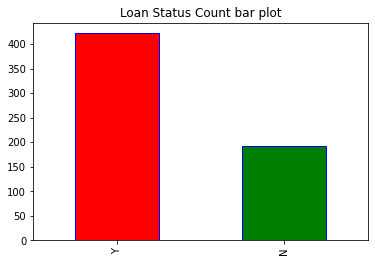

In [10]:
plt.title("Loan Status Count bar plot")
df['Loan_Status'].value_counts().plot.bar(color=['red','green'],edgecolor= 'blue')

it is plotting the number of Loan Staus Y= yes and N= No

<AxesSubplot:title={'center':'Credit History'}>

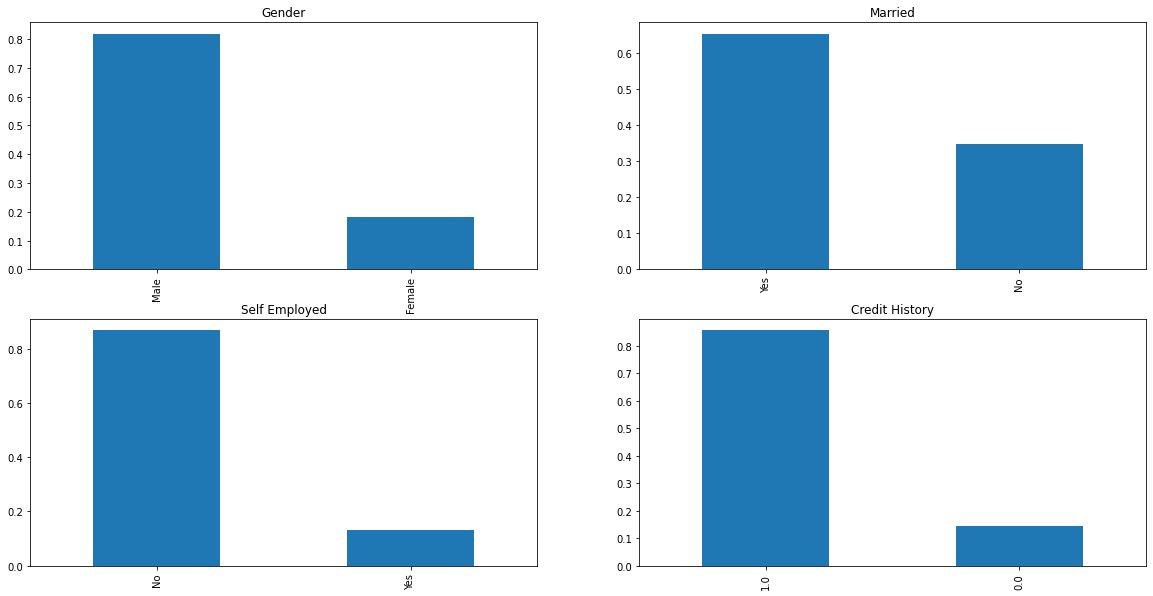

In [11]:
#now plot of categorical features
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2,2,4)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

it is the plot of total number of coulmns , here normalize = True means that it is showing the data in percentage

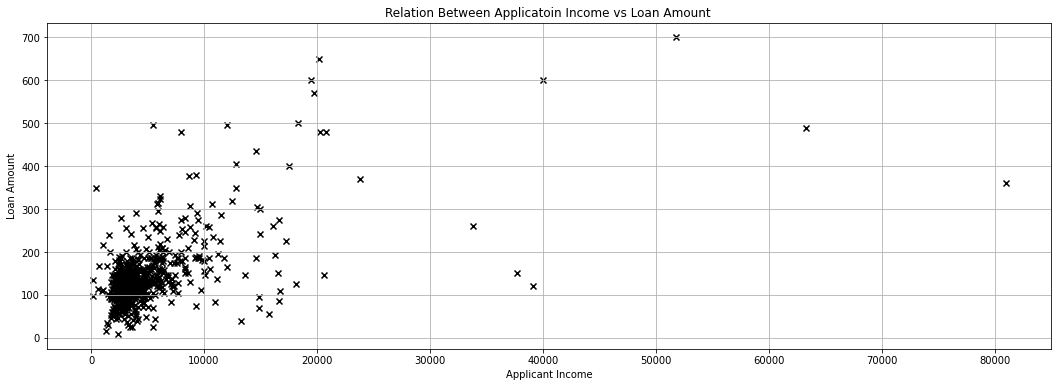

In [12]:
#relationship versus Applicant Income vs Loan Amount
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

it is the plot of Applicant Income vs Loan Amount , we can see that people with lower income took the highest loan

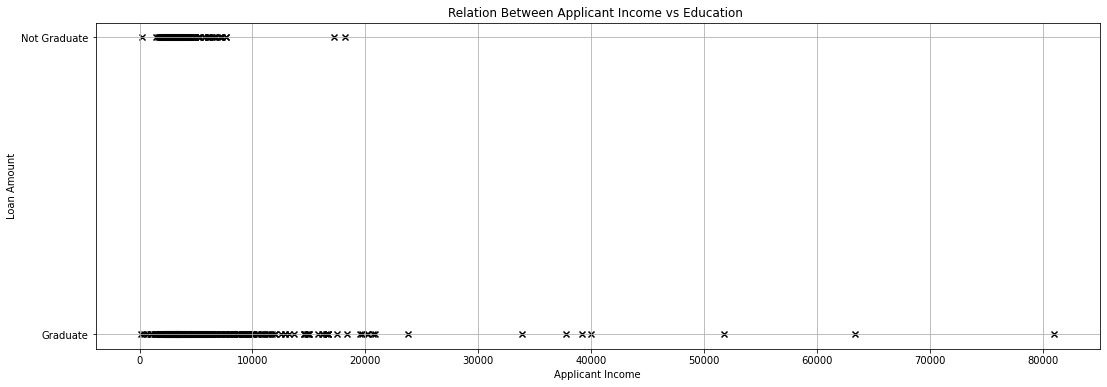

In [13]:
#relationship versus Applicant Income vs Education
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Education ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['Education'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

it is the plot of  Applicant Income vs Education we can see that People who are graduates have higher income compared to Non graduates

### now we need to encode = convert them into numeric data 
ex there are 2 values in Gender columsn Male and Female so it will be represented as 1 and 0.

In [14]:
#unique values
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Married': ['No', 'Yes'],
 'Dependents': ['0', '1', '2', '3+'],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes'],
 'Property_Area': ['Urban', 'Rural', 'Semiurban'],
 'Loan_Status': ['Y', 'N']}

#now using LabelEncoder to encode columns 
dfLoan_Status= df.Loan_Status.replace(['Male','Female'],[1,0])
<br>#but sklearn as easier way to do this




In [15]:
from sklearn.preprocessing import LabelEncoder
feature_cols=  ['Education', 'Dependents',
                'Gender','Married','Self_Employed','Loan_Status']
le= LabelEncoder()
for cols in feature_cols:
    df[cols]= le.fit_transform(df[cols])
    

we are passing column by column using for loop and LabelEncoder can itself assign different labels on different columns

In [16]:
#but since Property_area has 3 different columns it is better to one hot encode it
df= pd.get_dummies(df,columns=['Property_Area'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int32  
 1   Married                  614 non-null    int32  
 2   Dependents               614 non-null    int32  
 3   Education                614 non-null    int32  
 4   Self_Employed            614 non-null    int32  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int32  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int32(6), i

df['CoapplicantIncome']=df['CoapplicantIncome'].astype(np.int32)
df['LoanAmount'] = df['LoanAmount'].astype(np.int32)
df['Credit_History']=df['Credit_History'].astype(np.int32)
df['ApplicantIncome']=df['ApplicantIncome'].astype(np.int32)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(np.int32)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int32  
 1   Married                  614 non-null    int32  
 2   Dependents               614 non-null    int32  
 3   Education                614 non-null    int32  
 4   Self_Employed            614 non-null    int32  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int32  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int32(6), i

now let's scale the numerical colulmns because KNN is a algorithm which works with distance and if there are very large distances between data points then it will be misclassified so  let's use StandardScaler definition to scale the numerical columns

In [19]:
class StandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

so in the first function  we are finding mean for the whole columns and in the second function we are finding standard deviation 

In [20]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [21]:

rows= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
SS= StandardScaler()
for row in rows:
    df[rows]= SS.fit_transform(df[rows])

In [22]:
df # now that the data is scaled 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-1.157236e-17,360.0,1.0,1,0,0,1
1,1,1,1,0,0,-0.134412,-0.038732,-2.192733e-01,360.0,1.0,0,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-9.576410e-01,360.0,1.0,1,0,0,1
3,1,1,0,1,0,-0.462062,0.251980,-3.145466e-01,360.0,1.0,1,0,0,1
4,1,0,0,0,0,0.097728,-0.554487,-6.445428e-02,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-8.980952e-01,360.0,1.0,1,1,0,0
610,1,1,3,0,0,-0.212557,-0.554487,-1.267279e+00,180.0,1.0,1,1,0,0
611,1,1,1,0,0,0.437174,-0.472404,1.269371e+00,360.0,1.0,1,0,0,1
612,1,1,2,0,0,0.357064,-0.554487,4.833669e-01,360.0,1.0,1,0,0,1


now making sure that X has features and Y has target variables we are trying to predict

In [23]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-1.157236e-17,360.0,1.0,1,0,0,1
1,1,1,1,0,0,-0.134412,-0.038732,-2.192733e-01,360.0,1.0,0,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-9.576410e-01,360.0,1.0,1,0,0,1
3,1,1,0,1,0,-0.462062,0.251980,-3.145466e-01,360.0,1.0,1,0,0,1
4,1,0,0,0,0,0.097728,-0.554487,-6.445428e-02,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-8.980952e-01,360.0,1.0,1,1,0,0
610,1,1,3,0,0,-0.212557,-0.554487,-1.267279e+00,180.0,1.0,1,1,0,0
611,1,1,1,0,0,0.437174,-0.472404,1.269371e+00,360.0,1.0,1,0,0,1
612,1,1,2,0,0,0.357064,-0.554487,4.833669e-01,360.0,1.0,1,0,0,1


In [24]:
df= df.reset_index(drop=True)

In [25]:
X=df.drop('Loan_Status', axis=1) #putting all column except Loan_Status column on X
y= df.Loan_Status  #putting only Loan_Status column on Y since it's target variable

In [26]:
X= X.to_numpy()

In [27]:
y= y.to_numpy()

In [28]:
#now preprocessing part is done , now let's divide dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)


#test_size= 0.25 means that 25% of the datset wiil be used for testing purpose 


now let's implement our own custom KNN function from scratch

In [29]:
##########till here check

In [30]:
X_train

array([[1., 1., 3., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [31]:
X_test

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 2., ..., 1., 0., 0.],
       [1., 1., 2., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
y_train

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [33]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        ## Your CODE
        sum += (v1[index]-v2[index])**2
    return sum ** 0.5

In [34]:
class OurKNearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self,k, metric=EuclideanDistance):  # here we are instantiating a class class _init__ so that it will be always be called 
        self.metric = metric
        self.k=k
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):  #here we are just copying the data so it's Big-O is O(1) 
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):    #here since it wehave to go through each test data point and calculate distance with 
        results = []                 #all the train data points it's complexity will be O(m*n), m =no of testdata and
        for item in test_data:       #n = no of train data point
            results.append(self._predict_item(item))
        return results
    
# in the function above we get all the test data and we iterate over it means that we go 1 by 1 over each row in test data set and we 
#call the function below to provide labels
    
    # Private function for making a single prediction using KNN.
    def _predict_item(self, item):
        
        best_labels = None
        distances= []
        
        for i in range(len(self.train_data)):  #it means for each training data
            distance= self.metric(self.train_data[i,:],item)  # calculate distance between test data point and training data
            distances.append(distance)  # add all the distance to a list
        distances= np.array(distances)  # covert it into array for using argsort
        dist= np.argsort(distances)[:self.k]  # it sorts distances because we need least k distances
        labels= self.train_labels[dist]  # it converts so k lists to labels
        
        #voting
        lab= mode(labels)  # it calculated mode of the label
        best_labels= lab.mode[0]  # it selects most repeated label
        return best_labels # it returns that label   for a test point
    
    
"""in the function above we are calculating distance of each point of test data with all points of training data and we are 
finding it' labels bases on shortest distance between k points hence the name K -nearest neighbors
we are using mode function to take out the most common label and return it so that our predict function can return the list of
labels for  out test set"""

"in the function above we are calculating distance of each point of test data with all points of training data and we are \nfinding it' labels bases on shortest distance between k points hence the name K -nearest neighbors\nwe are using mode function to take out the most common label and return it so that our predict function can return the list of\nlabels for  out test set"

#now what's importank is to pick K-> number of points to consider inorder to
classify the test point

total: 154  correct: 110  accuracy: 0.71 K=1
total: 154  correct: 102  accuracy: 0.66 K=2
total: 154  correct: 115  accuracy: 0.75 K=3
total: 154  correct: 116  accuracy: 0.75 K=4
total: 154  correct: 113  accuracy: 0.73 K=5
total: 154  correct: 110  accuracy: 0.71 K=6
total: 154  correct: 108  accuracy: 0.70 K=7
total: 154  correct: 111  accuracy: 0.72 K=8
total: 154  correct: 110  accuracy: 0.71 K=9
total: 154  correct: 108  accuracy: 0.70 K=10
total: 154  correct: 109  accuracy: 0.71 K=11
total: 154  correct: 110  accuracy: 0.71 K=12
total: 154  correct: 109  accuracy: 0.71 K=13
total: 154  correct: 113  accuracy: 0.73 K=14
total: 154  correct: 108  accuracy: 0.70 K=15
total: 154  correct: 112  accuracy: 0.73 K=16
total: 154  correct: 109  accuracy: 0.71 K=17
total: 154  correct: 110  accuracy: 0.71 K=18
total: 154  correct: 107  accuracy: 0.69 K=19
total: 154  correct: 109  accuracy: 0.71 K=20
total: 154  correct: 108  accuracy: 0.70 K=21
total: 154  correct: 109  accuracy: 0.71 K=

Text(0, 0.5, 'Testing Accuracy')

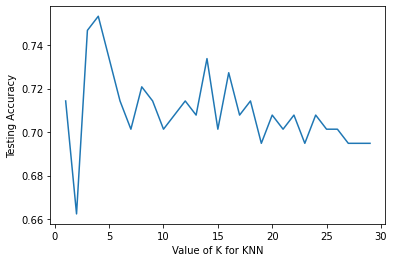

In [35]:
#
result = []
for k in range(1,30):
    
    clf = OurKNearestNeighbors(k)  
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    correct, total = 0, 0
    for pred, label in zip(preds, y_test):
        if pred == label: correct += 1
        total += 1
    print ('total: %3d  correct: %3d  accuracy: %3.2f K=%d' %(total, correct, 1.0*correct/total,k))
    result.append(1.0*correct/total)
##plot the result
plt.plot(range(1,30),result)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

in the above function are just repeating the above function to find best value of k because the accuracy or performance of the algorithm depends on value of k
so we are just trying to predict the best value of k


In [36]:
#it looks like the best valur for K= 3 so we will use that to predict 
model= OurKNearestNeighbors(3)
model.fit(X_train,y_train)

In [37]:
pred= model.predict(X_test)

In [38]:
#now let's print accuracy score again
def accuracy_score(y_true, y_pred, normalize=True):
    correct = sum(y_true == y_pred)
    return correct / len(y_true) if normalize else correct

In [39]:
accuracy_score(y_test,pred)

0.7337662337662337

In [40]:
#now let's print confusion matrix it helps to see how our classifider did
def confusion_matrix(y_true, y_pred, labels=None):
    labels = labels if labels else sorted(set(y_true) | set(y_pred))        
    indexes = {v:i for i, v in enumerate(labels)}
    matrix = np.zeros((len(indexes),len(indexes))).astype(int)
    for t, p in zip(y_true, y_pred):
        matrix[indexes[t], indexes[p]] += 1
    return matrix

In [41]:
confusion_matrix(y_test,pred)

array([[ 11,  38],
       [  3, 102]])

so 10 = true positive = which is true and is also predicted true
31 is true negative = which is true but positive false
3 is false positve= which is false but predicted as positive
and 110 is false positive = which is false and predicted as false
In our case model did 34 predictions but that is good since we had so little data

let's create Big-O plots for the KNN algorithm
for that let's create random 1000values to see it
so we are creating random integers using randint function
and passing it through KNN to calcuate the time it needs to process it
and shape is important bcs training data shape and test data shape neeeds to be same


In [139]:
from numpy.random import randint
import time
elements= list()
elements2= list()
times= list()
times2= list()
for i in range(1,20):
    train = randint(0,100*i, size=(100*i,2))
    label= randint(0,100*i, 100*i)
    test= randint(0,50*i,size=(50*i,2))
    cc= OurKNearestNeighbors(14)
    start= time.time()
    cc.fit(train,label)
    end= time.time()
    cc.predict(test)
    end2 = time.time()
    
    print(len(train), "element took time to fit :",end-start,len(test), "element took to predict", end2-start)
    elements.append(len(train))
    elements2.append(len(test))
    times.append(end-start)
    times2.append(end2-start)
    
    

100 element took time to fit : 0.0 50 element took to predict 0.03888082504272461
200 element took time to fit : 0.0 100 element took to predict 0.10854029655456543
300 element took time to fit : 0.0 150 element took to predict 0.2116231918334961
400 element took time to fit : 0.0 200 element took to predict 0.3381381034851074
500 element took time to fit : 0.0 250 element took to predict 0.5412273406982422
600 element took time to fit : 0.0 300 element took to predict 0.7990808486938477
700 element took time to fit : 0.0 350 element took to predict 0.9756183624267578
800 element took time to fit : 0.0 400 element took to predict 1.2160592079162598
900 element took time to fit : 0.0 450 element took to predict 1.7159230709075928
1000 element took time to fit : 0.0 500 element took to predict 2.4040279388427734
1100 element took time to fit : 0.0 550 element took to predict 2.8181653022766113
1200 element took time to fit : 0.0 600 element took to predict 3.254863739013672
1300 element 

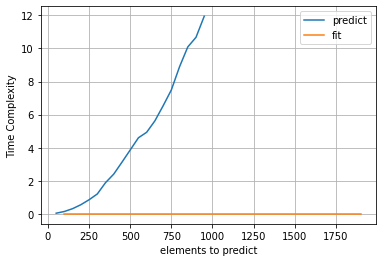

In [128]:
plt.xlabel('elements to predict')
plt.ylabel('Time Complexity')
plt.plot(elements2, times2, label ='predict')
plt.plot(elements, times,label='fit')
plt.grid()
plt.legend()
plt.show()

from above graph we can see that to fit it always takes O(1) time and to predict it takes  quadratic time so it's complexity is O(n*m)  = O(n^2)

for the upper one we put dimension of training and testing data constant let's see what happens  if we increase it as well


so it looks like the shape of test shape has increasing effect on time taken to predict as well because this algorithm works by calculating distance between each row of points in test set with each row of point in training data 
which in a simple word means 
there is 1 row data
there are 10 rows data
then that 1 row data iterated through 10 rows   to find distance
then it gets labels from closest k points
and the most common label is returned
so more data = more time and also more dimension = more time
so it depends on data as well as it's dimension


In [133]:
from numpy.random import randint
import time
elements= list()
elements3= list()
times= list()
times3= list()
for i in range(1,20):
    train = randint(0,100*i, size=(100*i,i))
    label= randint(0,100*i, 100*i)
    test= randint(0,50*i,size=(50*i,i))
    cc= OurKNearestNeighbors(14)
    start= time.time()
    cc.fit(train,label)
    end= time.time()
    cc.predict(test)
    end2 = time.time()
    
    print(np.shape(train), "shape wit element took time to fit :",end-start,np.shape(test), "element took to predict", end2-start)
    elements.append(np.shape(train))
    elements3.append(np.shape(test))
    times.append(end-start)
    times3.append(end2-start)
    
    

(100, 1) shape wit element took time to fit : 0.0 (50, 1) element took to predict 0.046552181243896484
(200, 2) shape wit element took time to fit : 0.0 (100, 2) element took to predict 0.09917974472045898
(300, 3) shape wit element took time to fit : 0.0 (150, 3) element took to predict 0.2359023094177246
(400, 4) shape wit element took time to fit : 0.0 (200, 4) element took to predict 0.4268949031829834
(500, 5) shape wit element took time to fit : 0.0 (250, 5) element took to predict 0.7460341453552246
(600, 6) shape wit element took time to fit : 0.0 (300, 6) element took to predict 1.2049787044525146
(700, 7) shape wit element took time to fit : 0.0 (350, 7) element took to predict 1.843062400817871
(800, 8) shape wit element took time to fit : 0.0 (400, 8) element took to predict 2.5432260036468506
(900, 9) shape wit element took time to fit : 0.0 (450, 9) element took to predict 3.01304292678833
(1000, 10) shape wit element took time to fit : 0.0 (500, 10) element took to predi

In [134]:
# now since there are dimension of data let's multiply them to get understandable result
for i in range(19):
    elements[i]=elements[i][0]
    elements3[i]=elements3[i][0]
    
#this function just saves number of elements to make it easier to plot
    

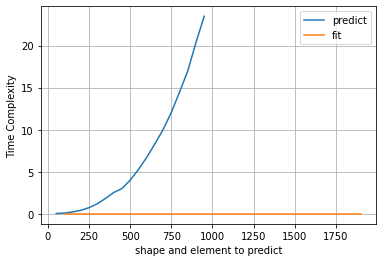

In [135]:
plt.xlabel('shape and element to predict')
plt.ylabel('Time Complexity')
plt.plot(elements3, times3, label ='predict')
plt.plot(elements, times,label='fit')
plt.grid()
plt.legend()
plt.show()

#now let's compare the plot 

In [140]:
elements2

[50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950]

In [138]:
times2

[0.043035268783569336,
 0.14699959754943848,
 0.31800293922424316,
 0.5559630393981934,
 0.856034517288208,
 1.204958438873291,
 1.8890008926391602,
 2.406839370727539,
 3.1272215843200684,
 3.863431930541992,
 4.601558685302734,
 4.933000326156616,
 5.623035669326782,
 6.531926393508911,
 7.491034507751465,
 8.896083116531372,
 10.090017318725586,
 10.673909902572632,
 11.946033477783203,
 0.03900623321533203,
 0.15299558639526367,
 0.3710305690765381,
 0.6890013217926025,
 1.1519160270690918,
 1.7990553379058838,
 2.6280362606048584,
 3.6650002002716064,
 4.945003032684326,
 6.715239524841309,
 8.891733169555664,
 10.640003442764282,
 11.79299783706665,
 8.707037448883057,
 10.636057615280151,
 14.989886999130249,
 16.584561824798584,
 19.414154052734375,
 22.372262954711914]

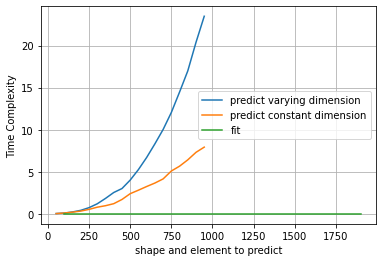

In [141]:
plt.xlabel('shape and element to predict')
plt.ylabel('Time Complexity')
plt.plot(elements3, times3, label ='predict varying dimension')
plt.plot(elements2, times2, label ='predict constant dimension')

plt.plot(elements, times,label='fit')
plt.grid()
plt.legend()
plt.show()

#from this plot we can see that dimenstion also has clear impact on the KNN algorithm performance
hence the complexity of KNN model is d*M*n where d= dimension, M - training data and n = test data